In [2]:
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import networkx as nx

In [246]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import datetime

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [247]:
import scipy as sc
#%matplotlib inline

In [58]:
import sklearn.metrics as mr

In [195]:
import matplotlib.colors as mcolors
import numpy as np

In [8]:
# Первичная работа с графом
def view_graph(filename):
    
    # вытягиваем список смежности из файла
    G = nx.read_edgelist(filename, comments='%', nodetype=int)
    V = int(G.number_of_nodes()) # кол-во вершин
    E = int(G.number_of_edges()) # кол-во ребер
    
    # вывод результатов
    print('Количество узлов в сети:', V)
    print('Количество связей в сети:', E)
    print('Количество изолированных узлов в сети:', len(list(nx.isolates(G))))
    
    # визуализация графа
    pos = nx.spring_layout(G, iterations = 200)
    nx.draw(G, pos, node_color = range(V), node_size = 10, cmap = plt.cm.Blues)
    return G

In [267]:
def draw_nodes_distr(graph):
    
    dgr_seq = sorted([d for n, d in graph.degree()], reverse=True)  
    ndeg_cntr = Counter(dgr_seq)
    deg, cnt = zip(*ndeg_cntr.items())
    cnt_p = [c/graph.number_of_nodes() for c in cnt]
    
    fig, ax = plt.subplots(1,2, figsize = (14,7))
    ax[0].bar(deg, cnt, color='r')
    ax[1].scatter(deg, cnt_p, color='r')
    ax[0].set_title("Распределение степеней узлов")
    ax[1].set_title("Распределение степеней узлов")
    ax[0].set_ylabel("Частота встречаемости")
    ax[0].set_xlabel("Степень")
    ax[1].set_ylabel("Частота встречаемости")
    ax[1].set_xlabel("Степень")
    plt.show()

In [143]:
# Применение PageRank к графу в трех вариациях
def pageranking(graph):
    
    # словарь с итогами вычислений
    realizations = {
        'power iteration': nx.pagerank(graph),
        'scipy': nx.pagerank_scipy(graph),
        'numpy': nx.pagerank_numpy(graph)
    }
    
    page_ranks = []
    for realization in realizations:
        #print(realizations[realization])
        page_ranks.append(list(realizations[realization].items()))
    #print(page_ranks)
    
    p_r = []
    ranks = []
    for j in range(3):
        p_r.append([])
        ranks.append([])
        for i in range(len(page_ranks[j])):
                p_r[j].append(list(page_ranks[j][i]))
                p_r[j][i][0] = int(p_r[j][i][0])
        ranks[j] = (sorted(p_r[j], key = lambda item:item[1], reverse = True)) # сортировка списков по значениям весов
    return ranks

In [153]:
def vizualize_pagerank(p_r):
    nodes = []
    ranks = []
    for i in range(len(p_r)):
        nodes.append([])
        ranks.append([])
        for j in range(len(p_r[i])):
            nodes[i].append(p_r[i][j][0])
            ranks[i].append(p_r[i][j][1]) 
    #print(nodes)
    
    f = plt.figure(figsize = (11,15))
    ax1 = f.add_subplot(311)
    #plt.subplot(2, 1, 1)
    ax1.scatter(nodes[0], ranks[0])
    ax1.set_ylim(0, 0.02)
    ax1.set_title('Результат работы алгоритма PageRank со степенной итерацией')
    ax1.set_xlabel('Номер узла')
    ax1.set_ylabel('Рейтинг узла')
    
    ax2 = f.add_subplot(312)
    ax2.scatter(nodes[1], ranks[1], color='r')
    ax2.set_ylim(0, 0.02)
    ax2.set_title('Результат работы алгоритма PageRank SciPy')
    ax2.set_xlabel('Номер узла')
    ax2.set_ylabel('Рейтинг узла')
    
    ax2 = f.add_subplot(313)
    ax2.scatter(nodes[2], ranks[2], color='g')
    ax2.set_ylim(0, 0.02)
    ax2.set_title('Результат работы алгоритма PageRank NumPy')
    ax2.set_xlabel('Номер узла')
    ax2.set_ylabel('Рейтинг узла')
    return nodes, ranks

In [167]:
def compare_pageranks(weights):
    weighted_classic = weights[1][0]
    weighted_scipy = weights[1][1]
    weighted_numpy = weights[1][2]
    m_ab_er1 = mr.mean_absolute_error(weighted_classic, weighted_scipy)
    m_sq_er1 = mr.mean_squared_error(weighted_classic, weighted_scipy)
    m_ab_er2 = mr.mean_absolute_error(weighted_classic, weighted_numpy)
    m_sq_er2 = mr.mean_squared_error(weighted_classic, weighted_numpy)
    m_ab_er3 = mr.mean_absolute_error(weighted_scipy, weighted_numpy)
    m_sq_er3 = mr.mean_squared_error(weighted_scipy, weighted_numpy)
    print('MAE для PageRank и PageRank Scipy:', m_ab_er1)
    print('MSE для PageRank и PageRank Scipy:', m_sq_er1)
    print()
    print('MAE для PageRank и PageRank Numpy:', m_ab_er2)
    print('MSE для PageRank и PageRank Numpy:', m_sq_er2)
    print()
    print('MAE для PageRank SciPy и PageRank Numpy:', m_ab_er3)
    print('MSE для PageRank SciPy и PageRank Numpy:', m_sq_er3)

In [269]:
def algorithm_timer(graph):
    v = graph.number_of_nodes()
    e = graph.number_of_edges()
    print('Время выполнения PageRank для графа с', v, 'вершинами и', e, 'ребрами:')
    start = datetime.datetime.now()
    nx.pagerank(graph)
    end = datetime.datetime.now()
    work_time = (end - start).total_seconds()
    print('Для реализации со степенной итерацией:', work_time, 'сек.')
    start = datetime.datetime.now()
    nx.pagerank_scipy(graph)
    end = datetime.datetime.now()
    work_time = (end - start).total_seconds()
    print('Для scipy-реализации:', work_time, 'сек.')
    start = datetime.datetime.now()
    nx.pagerank_numpy(graph)
    end = datetime.datetime.now()
    work_time = (end - start).total_seconds()
    print('Для numpy-реализации:', work_time, 'сек.')

In [265]:
def most_valuable_pages(graph, tops_number = 10):
    
    p_r = pageranking(graph)
    
    nodes = []
    ranks = []
    for i in range(len(p_r)):
        nodes.append([])
        ranks.append([])
        for j in range(len(p_r[i])):
            nodes[i].append(p_r[i][j][0])
            ranks[i].append(p_r[i][j][1])
            
    nodes_classic = np.array(nodes[0][0:tops_number])
    ranks_classic = np.array(ranks[0][0:tops_number])
    lal = list(map(str, nodes_classic))
    bar_lab = [round(rank, 7) for rank in ranks_classic]
    title = "Топ " + str(tops_number) + " страниц с наибольшим значением ранга"
    #clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         #(0.7, "green"), (0.75, "blue"), (1, "blue")]
    #rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
    
    my_colors = 'rgbkymc'
    f, ax = plt.subplots(figsize = (12, 8))
    br = plt.bar(nodes_classic, height = ranks_classic, width = 5, alpha = 0.5, color = my_colors, tick_label = lal)
    title = "Топ " + str(tops_number) + " страниц с наибольшим значением ранга"
    plt.xlabel("Номера страниц")
    plt.ylabel("Рейтинги страниц")
    plt.title(title)
    def autolabel(rects):
        for idx, rect in enumerate(br):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                    bar_lab[idx],
                    ha = 'center', va = 'bottom', rotation = 90)

    autolabel(br)

    plt.ylim(0,0.02)
    plt.show()

Количество узлов в сети: 379
Количество связей в сети: 914
Количество изолированных узлов в сети: 0


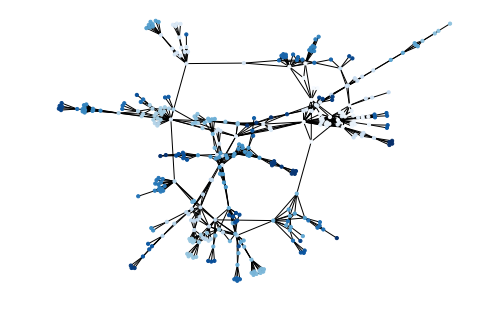

In [13]:
G1 = view_graph("src.edgelist")

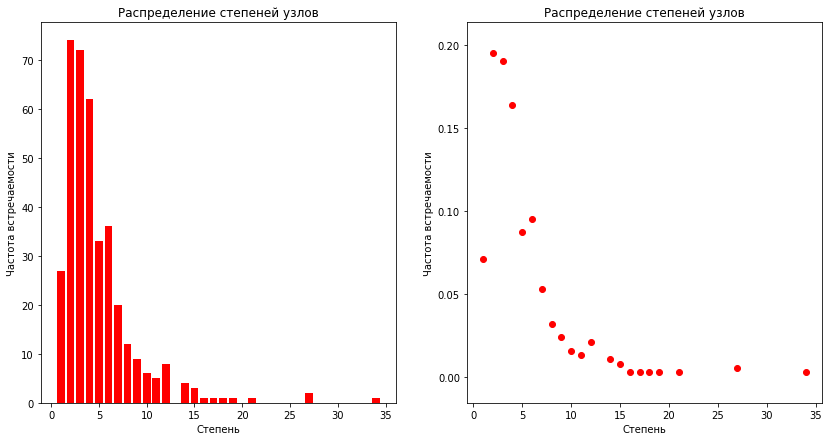

In [268]:
draw_nodes_distr(G1)

3

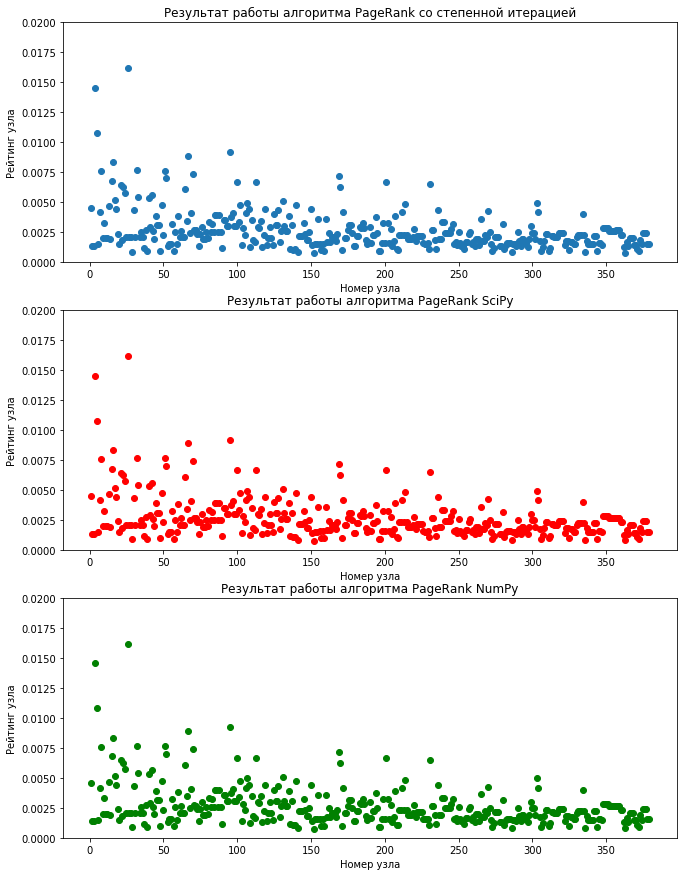

In [154]:
rank = pageranking(G1)
weights = vizualize_pagerank(rank)
#len(weights[0])

In [168]:
compare_pageranks(weights)

MAE для PageRank и PageRank Scipy: 4.711559308927772e-19
MSE для PageRank и PageRank Scipy: 5.261810464828524e-37

MAE для PageRank и PageRank Numpy: 3.4070607923808104e-06
MSE для PageRank и PageRank Numpy: 2.559679564147556e-11

MAE для PageRank SciPy и PageRank Numpy: 3.4070607923808887e-06
MSE для PageRank SciPy и PageRank Numpy: 2.5596795641475834e-11


In [271]:
algorithm_timer(G1)

Время выполнения PageRank для графа с 379 вершинами и 914 ребрами:
Для реализации со степенной итерацией: 0.09278 сек.
Для scipy-реализации: 0.003991 сек.
Для numpy-реализации: 0.051451 сек.


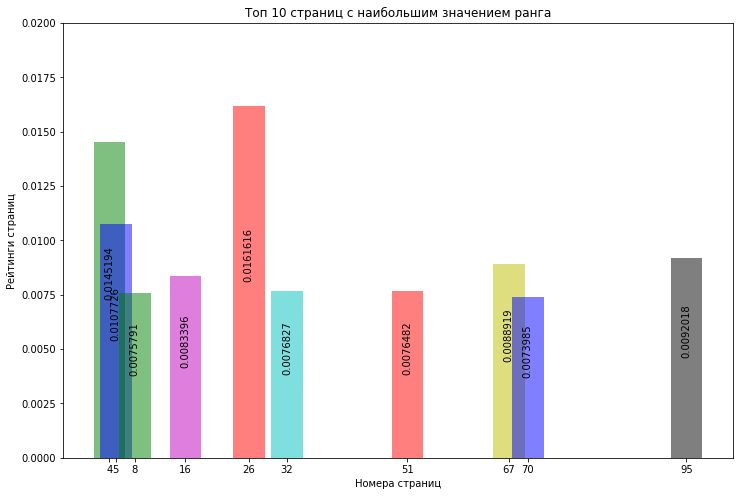

In [266]:
most_valuable_pages(G1)